## Preparation

### Libraries and Global Variables

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

random_state = 42

### Importing dataset

In [ ]:
pip install ucimlrepo

In [32]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
df = pd.concat([X, y], axis=1)



## Exploratory Analysis

### Basic Information

In [33]:
df.shape

(6497, 12)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [35]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [36]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### YData Profiling Report

In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df)

### Histogram of the Output Score

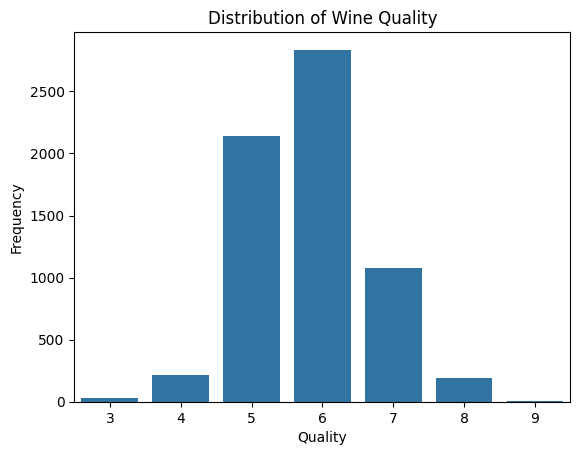

In [37]:
# Histogram of wine quality (target variable)
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

### Histogram of the All Features


<Figure size 1200x1000 with 0 Axes>

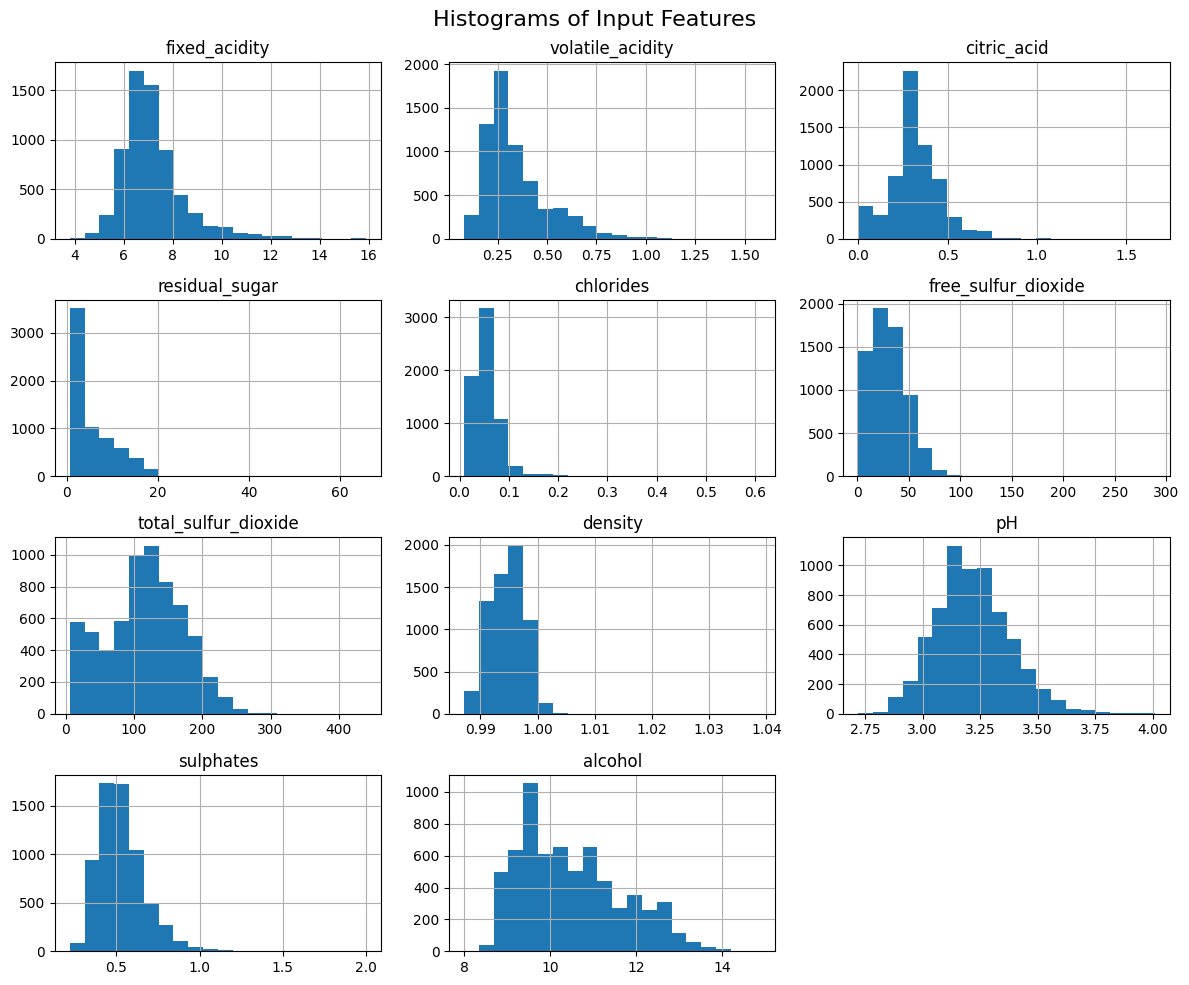

In [38]:
# Histogram of input features
X = wine_quality.data.features
y = wine_quality.data.targets

df = pd.concat([X, y], axis=1)

plt.figure(figsize=(12, 10))

df.iloc[:, :-1].hist(bins=20, figsize=(12, 10), layout=(4, 3)) 
plt.suptitle('Histograms of Input Features', fontsize=16)
plt.tight_layout()
plt.show()


### Correlation Heatmap of Input Features

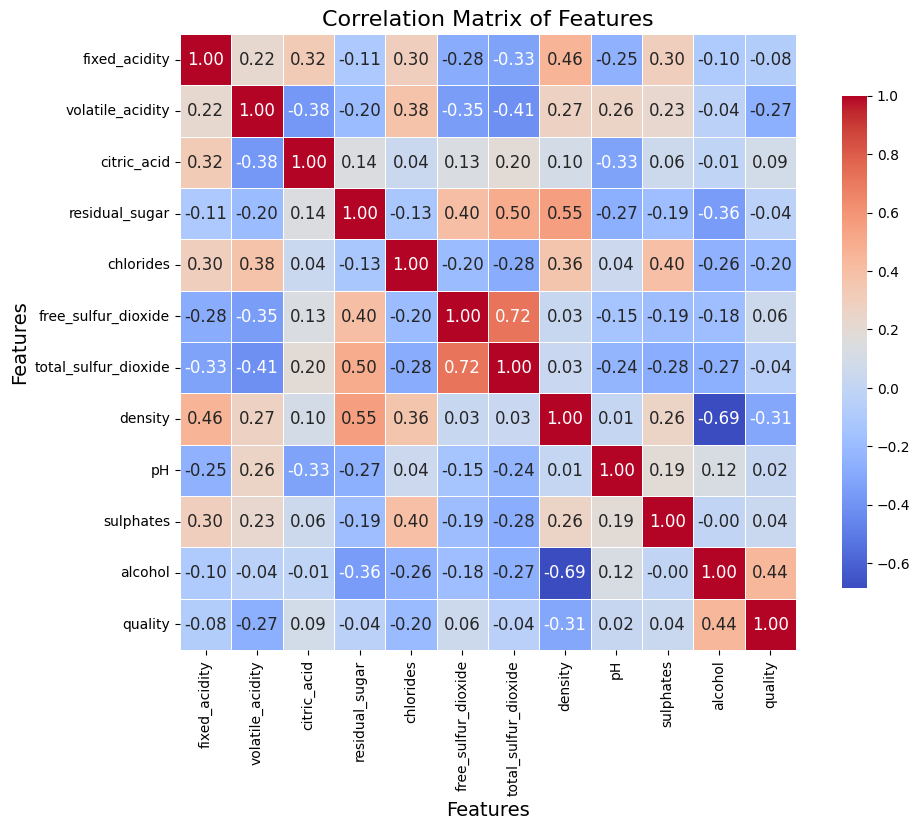

In [39]:
# Calculate correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix, 
    annot=True,          
    cmap='coolwarm',     
    fmt='.2f',           
    linewidths=0.5,      
    cbar_kws={'shrink': 0.8},  
    annot_kws={"size": 12},     
    square=True          
)

plt.title('Correlation Matrix of Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

## Data Preprocessing

### Train Test Split

We split data into training and testing sets, with 80% of the data in the training set, and 20% in the testing dataset, using random_state=42. We stratified using y because our target data is very imbalanced.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [41]:
print('Training data set size:', X_train.shape[0])
print('Testing data set size:', X_test.shape[0])

Training data set size: 5197
Testing data set size: 1300


### Data Scaling

We scaled the training data using standardization for models such as ANN. This was performed after the train test split to avoid data leakage.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training and Evaluation

### Artificial Neural Network Model

#### ANN Training & Hyperparameter Tuning

In [ ]:
# Raw data
from sklearn.neural_network import MLPClassifier

y_train = np.ravel(y_train)  # reshaping to avoid warning

hidden_layers = [
    (100,),            # 1 layer with 100 nodes
    (200,),            # 1 layer with 200 nodes
    (100, 50),         # 2 layers: 100 nodes, then 50 nodes
    (200, 100),        # 2 layers: 200 nodes, then 100 nodes
    (100, 50, 25)      # 3 layers: 100 -> 50 -> 25
]

# Creating a grid of hyperparameters
param_grid_ann = {
    'hidden_layer_sizes': hidden_layers,
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.005, 0.001],
    'max_iter': [1000],
    'alpha': [0.0005, 0.001, 0.01],
}

# Creating ANN model
ann_model_raw = MLPClassifier(random_state=random_state, early_stopping=True)

# Performing Grid Search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
grid_search_ann_raw = GridSearchCV(estimator=ann_model_raw, param_grid=param_grid_ann, cv=4, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_ann_raw.fit(X_train, y_train)

# Best hyperparameters
best_params_ann_raw = grid_search_ann_raw.best_params_
print("Best Hyperparameters:", best_params_ann_raw)

# Best estimator
best_ann_model_raw = grid_search_ann_raw.best_estimator_
y_pred_ann_raw = best_ann_model_raw.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann_raw))
print("Classification Report:")
print(classification_report(y_test, y_pred_ann_raw))

from sklearn.metrics import accuracy_score
accuracy_ann_raw = accuracy_score(y_test, y_pred_ann_raw)
print(f"Best Mean Accuracy with raw data: {grid_search_ann_raw.best_score_:.4f}")
print(f"Best Accuracy on Test Set with raw data: {accuracy_ann_raw:.4f}")


In [ ]:
# Scaled data

# Creating ANN model
ann_model_scaled = MLPClassifier(random_state=random_state, early_stopping=True)

# Performing Grid Search to find the best hyperparameters
grid_search_ann_scaled = GridSearchCV(estimator=ann_model_scaled, param_grid=param_grid_ann, cv=4, n_jobs=-1, verbose=1)
grid_search_ann_scaled.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params_ann_scaled = grid_search_ann_scaled.best_params_
print("Best Hyperparameters:", best_params_ann_scaled)

# Best estimator
best_ann_model_scaled = grid_search_ann_scaled.best_estimator_
y_pred_ann_scaled = best_ann_model_scaled.predict(X_test_scaled)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann_scaled))
# print("Classification Report:")
# print(classification_report(y_test, y_pred_ann_scaled))

accuracy_ann_scaled = accuracy_score(y_test, y_pred_ann_scaled)
print(f"Best Mean Accuracy with scaled data: {grid_search_ann_scaled.best_score_:.4f}")
print(f"Best Accuracy on Test Set with scaled data: {accuracy_ann_scaled:.4f}")


In [ ]:
from sklearn.decomposition import PCA

for n_component in range(5, 11):

    # PCA transformation
    pca = PCA(n_components=n_component)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Creating ANN model
    ann_model_pca = MLPClassifier(random_state=random_state, early_stopping=True)

    # Performing Grid Search to find the best hyperparameters
    grid_search_ann_pca = GridSearchCV(estimator=ann_model_pca, param_grid=param_grid_ann, cv=4, n_jobs=-1, verbose=1)
    grid_search_ann_pca.fit(X_train_pca, y_train)

    # Best hyperparameters
    best_params_ann_pca = grid_search_ann_pca.best_params_
    print(f"Best Hyperparameters for PCA (n_components={n_component}):", best_params_ann_pca)

    # Best estimator
    best_ann_model_pca = grid_search_ann_pca.best_estimator_
    y_pred_ann_pca = best_ann_model_pca.predict(X_test_pca)

    # Evaluation
    print(f"Confusion Matrix for PCA-transformed data (n_components={n_component}):")
    print(confusion_matrix(y_test, y_pred_ann_pca))
    # print(f"Classification Report fr PCA-transformed data (n_components={n_component}):")
    # print(classification_report(y_test, y_pred_ann_pca))

    print(f"Best Mean Accuracy with PCA (n_components={n_component}): {grid_search_ann_pca.best_score_:.4f}")
    print(f"Best Accuracy on Test Set with PCA (n_components={n_component}): {accuracy_score(y_test, y_pred_ann_pca):.4f}")


     


### K-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### kNN Training

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train.iloc[:, 0].values.ravel())
knn_pred = knn_classifier.predict(X_test)
print("K-Nearest Neighbors Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, knn_pred))

#### Fine tuning for KNN

In [ ]:
# Raw data

# fine tuning using Gridsearch
param_grid_knn = { 'n_neighbors': [3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance'], 'p': [1, 2] }
# the 1 and 2 are different types of distance, manhattan or euclidean
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=4,
    n_jobs=-1,
    #verbose=2
)
grid_search_knn.fit(X_train, y_train.ravel())
best_knn = grid_search_knn.best_estimator_

# Best hyperparameters
print("Best Parameters for KNN:", grid_search_knn.best_params_)
y_best_pred_knn = best_knn.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_best_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_best_pred_knn, zero_division=0))

print(f"Best Mean CV Accuracy with StandardScaler: {grid_search_knn.best_score_:.4f}")
print(f"Best Accuracy on Test Set with StandardScaler: {accuracy_score(y_test, grid_search_knn.predict(X_test)):.4f}")


In [ ]:
# Scaled data

grid_search_knn_scaled = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=4,
    n_jobs=-1,
    #verbose=2
)

grid_search_knn_scaled.fit(X_train_scaled, y_train.ravel())
best_knn_scaled = grid_search_knn_scaled.best_estimator_
print(f"Best Parameters for SVM (C and kernel) with StandardScaler:", grid_search_knn_scaled.best_params_)
print(f"Best Mean CV Accuracy with StandardScaler: {grid_search_knn_scaled.best_score_:.4f}")
print(f"Best Accuracy on Test Set with StandardScaler: {accuracy_score(y_test, best_knn_scaled.predict(X_test_scaled)):.4f}")

In [ ]:
# PCA data
from sklearn.decomposition import PCA 

for n_component in range(5, 11):
    
    # PCA transformation
    pca = PCA(n_components=n_component)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Performing Grid Search to find the best hyperparameters
    grid_search_knn_pca = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=param_grid_knn,
        cv=4,
        n_jobs=-1,
        #verbose=1
    )
    grid_search_knn_pca.fit(X_train_pca, y_train.ravel())

    # Best hyperparameters
    best_params_knn_pca = grid_search_knn_pca.best_params_
    print(f"Best Hyperparameters for PCA (n_components={n_component}):", best_params_knn_pca)

    # Best estimator
    best_knn_model_pca = grid_search_knn_pca.best_estimator_
    y_pred_knn_pca = best_knn_model_pca.predict(X_test_pca)

    # Evaluation
    print(f"Confusion Matrix for PCA-transformed data (n_components={n_component}):")
    print(confusion_matrix(y_test, y_pred_knn_pca))
    #print(f"Classification Report fr PCA-transformed data (n_components={n_component}):")
    #print(classification_report(y_test, y_pred_knn_pca, zero_division=1))

    print(f"Best Mean Accuracy with PCA (n_components={n_component}): {grid_search_knn_pca.best_score_:.4f}")
    print(f"Best Accuracy on Test Set with PCA (n_components={n_component}): {accuracy_score(y_test, y_pred_knn_pca):.4f}")

### Support Vector Machine

In [ ]:
# SVM raw data
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# SVM Classifier
param_grid_svm = {
    'C': [0.05, 0.1, 1, 5, 10, 20, 50],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    cv=4,
    n_jobs=-1,
    scoring='accuracy',
    return_train_score=True,
    verbose=2,
)

grid_search_svm.fit(X_train, y_train.iloc[:, 0].values.ravel())
best_svm = grid_search_svm.best_estimator_

# Best hyperparameters
print("Best Parameters for SVM:", grid_search_svm.best_params_)
y_best_pred_svm = best_svm.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_best_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_best_pred_svm, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, y_best_pred_svm))
print(f"Best Mean CV Accuracy: {grid_search_svm.best_score_:.4f}")

heatmap = sns.heatmap(
    grid_search_svm.cv_results_['mean_test_score'].reshape(len(param_grid_svm['C']), len(param_grid_svm['kernel'])),
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    xticklabels=param_grid_svm['kernel'],
    yticklabels=param_grid_svm['C']
)
plt.title("SVM Hyperparameter Tuning Heatmap")
plt.xlabel("Kernel")
plt.ylabel("C Value")
plt.show()

In [ ]:
# PCA data

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# The SVM model runs somewhat slow, so we will run each component separately
n_components = 7  # Set the number of components for PCA 

# PCA transformation
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Performing Grid Search to find the best hyperparameters
grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    cv=4,
    n_jobs=-1,
    scoring='accuracy',
    return_train_score=True,
    verbose=2,
)

grid_search_svm.fit(X_train_pca, y_train.iloc[:, 0].values.ravel())

best_svm = grid_search_svm.best_estimator_
best_params = grid_search_svm.best_params_

# Best hyperparameters
print(f"Best Parameters for SVM (C and kernel) with PCA (n_components={n_components}):", best_params)
print(f"Best Mean CV Accuracy with PCA (n_components={n_components}): {grid_search_svm.best_score_:.4f}")
print(f"Best Accuracy on Test Set with PCA (n_components={n_components}): {accuracy_score(y_test, best_svm.predict(X_test_pca)):.4f}")

In [ ]:
# Scaled data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svm,
    cv=4,
    n_jobs=-1,
    scoring='accuracy',
    return_train_score=True,
    verbose=2,
)

grid_search_svm.fit(X_train_scaled, y_train.iloc[:, 0].values.ravel())
best_svm = grid_search_svm.best_estimator_
best_params = grid_search_svm.best_params_

print(f"Best Parameters for SVM (C and kernel) with StandardScaler:", best_params)
print(f"Best Mean CV Accuracy with StandardScaler: {grid_search_svm.best_score_:.4f}")
print(f"Best Accuracy on Test Set with StandardScaler: {accuracy_score(y_test, best_svm.predict(X_test_scaled)):.4f}")

### Scores

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np


classes = sorted(y_train.iloc[:, 0].unique())
n_classes = len(classes)
y_test_binarized = label_binarize(y_test, classes=classes)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'KNN': OneVsRestClassifier(KNeighborsClassifier(n_neighbors=13, weights='distance', p=1)),
    'SVM': OneVsRestClassifier(SVC(C=50, kernel='rbf', gamma=1, probability=True)),
    'ANN': OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
}

colors = cycle(['darkorange', 'blue', 'green'])
plt.figure(figsize=(10, 8))

for (name, model), color in zip(models.items(), colors):
    model.fit(X_train_scaled, label_binarize(y_train.iloc[:, 0], classes=classes))
    y_score = model.predict_proba(X_test_scaled)

  
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{name} (AUC = {roc_auc["micro"]:.2f})', color=color)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged ROC Curve for Multiclass Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()